# Github Repo:
https://github.com/miickii/CompSci-Assignments

Contributions:
50/50

# Formalia

Please read the [assignment overview page](https://github.com/TheYuanLiao/comsocsci2025/wiki/Assignments) carefully before proceeding. The page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment.

We teach about Pandas Dataframe and there is a video on how to use pandas and mistakes not to make when using it (see [Week 2](https://nbviewer.org/github/TheYuanLiao/comsocsci2025/blob/main/lectures/Week2.ipynb)/Prelude to part 3: Pandas Dataframes). We expect you to apply that knowledge in all exercises. A score of 3 means "excellent", where we expect you to deliver efficient dataframe operations, i.e., operations are implemented in a vectorized, efficient manner using pandas recommended practices.

__If you fail to follow these simple instructions, it will negatively impact your grade!__

**Due date and time**: The assignment is due on April 1st at 23:59. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Assignment 2)_. 

Remember to include in the first cell of your notebook:
* the link to your group's Git repository 
* group members' contributions


## Part 1: Properties of the real-world network of Computational Social Scientists

These exercises are taken from Week 5. Please note that 2 Degree distribution is taken out and 3 Shortest paths is numbered 2 here.
> __Exercise: Analyzing Networks through a Random Model__ 
>
>
>
> 1. _Random Network_: Let's start by building a Random Network, acting as a baseline (or ["null model"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.  

In [1]:
import networkx as nx
import pickle
import pandas as pd
%matplotlib inline

researchers_graph = nx.Graph()

edgelist_df = pd.read_csv("files/weighted_edgelist.csv")

# Tilføj vægtede kanter fra edgelisten
researchers_graph.add_weighted_edges_from(edgelist_df.itertuples(index=False, name=None))

# Udskriv grundlæggende information om grafen
print(f"Antal noder: {researchers_graph.number_of_nodes()}")
print(f"Antal kanter: {researchers_graph.number_of_edges()}")

Antal noder: 16190
Antal kanter: 65448


> * First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding _p_, figure out the average degree (using the given formula). 

We can use the formula $⟨L⟩ = p\cdot \frac{N(N-1)}{2}$ and isolate p:
$$
p = \frac{2⟨L⟩}{N(N-1)}
$$

We know that the number of edges should be 65448, so $⟨L⟩ = 65448$, and we can find p:

In [2]:
L = researchers_graph.number_of_edges()
p = 2*L / (researchers_graph.number_of_nodes() * (researchers_graph.number_of_nodes() - 1))
k = 2*L / researchers_graph.number_of_nodes()
p, k

(0.0004994126094892593, 8.084990735021618)

#### p is 0.000499, and the average degree is 8.1

> * Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.  

In [4]:
import numpy as np
def generate_random_network(graph, p):
    random_graph = nx.Graph()
    random_graph.add_nodes_from(graph.nodes)
    
    for node1 in graph.nodes:
        for node2 in graph.nodes:
            if node1 < node2 and np.random.uniform() < p:
                random_graph.add_edge(node1, node2)
    
    return random_graph

> * Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below). 

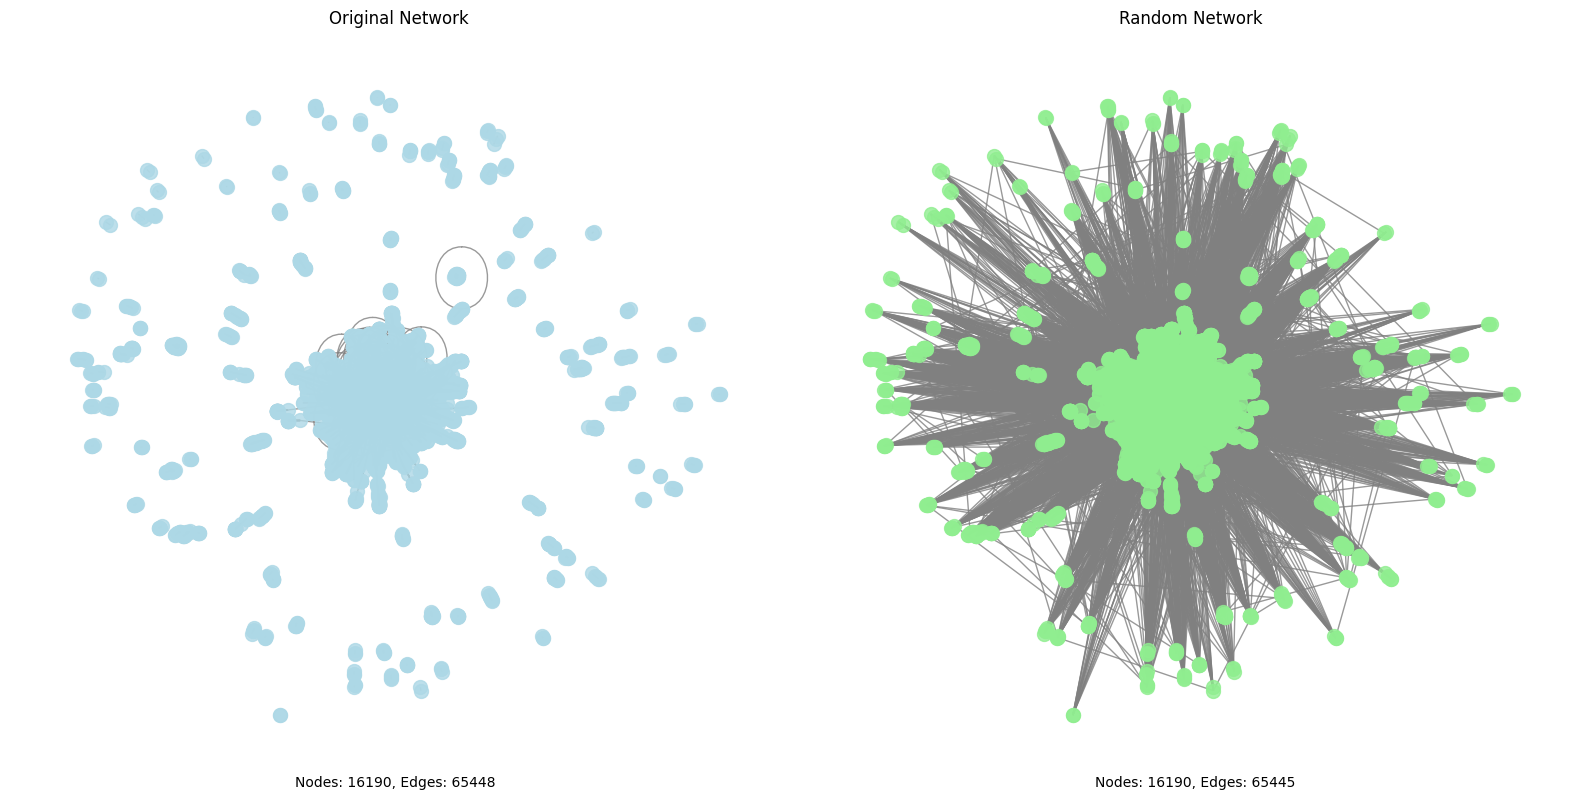

In [5]:
import matplotlib.pyplot as plt
def visualize_networks(original_graph, random_graph, title1="Original Network", title2="Random Network"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Ensure both graphs have the same layout for better comparison
    pos = nx.spring_layout(original_graph, seed=42)
    
    # Plot original network
    nx.draw_networkx(
        original_graph, 
        pos=pos,
        ax=ax1,
        node_size=100,
        node_color='lightblue',
        edge_color='gray',
        alpha=0.8,
        with_labels=False
    )
    ax1.set_title(title1)
    ax1.axis('off')
    
    # Plot random network
    nx.draw_networkx(
        random_graph, 
        pos=pos,  # Using same positions as original
        ax=ax2,
        node_size=100,
        node_color='lightgreen',
        edge_color='gray',
        alpha=0.8,
        with_labels=False
    )
    ax2.set_title(title2)
    ax2.axis('off')
    
    # Add network statistics
    fig.text(0.25, 0.01, f"Nodes: {original_graph.number_of_nodes()}, Edges: {original_graph.number_of_edges()}", ha='center')
    fig.text(0.75, 0.01, f"Nodes: {random_graph.number_of_nodes()}, Edges: {random_graph.number_of_edges()}", ha='center')
    
    plt.tight_layout()
    plt.show()

random_network = generate_random_network(researchers_graph, p)
visualize_networks(researchers_graph, random_network)

> * Answer the following questions:  
>    - What regime does your random network fall into? Is it above or below the critical threshold?  

It falls into the supercritical regime, the average degree is 8.05, which is above the critical threshold.

>    - According to the textbook, what does the network's structure resemble in this regime?  

- Giant component emerges containing a finite fraction of all nodes
- Small isolated components coexist with the giant component
- Most real networks fall into this regime

>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.

- There are a lot more components in the real network, and many more small isolated components spread around the giant component
- The textbook indicates that real networks have higher clustering coefficients than random networks with the same number of nodes and links, which is clearly demonstrated here (0.6717 vs 0.0006).
- The degree distribution discrepancy aligns with Section 3.5's observation that random networks fail to account for highly connected nodes (hubs) that are frequently observed in real networks.
- The number of components differs significantly. While both networks are in the supercritical regime, the random network is closer to the connected regime with fewer isolated components, while the actual network maintains many small isolated components despite having a similar average degree.
- Section 3.9 notes that in real networks, the clustering coefficient typically decreases with node degree, which isn't captured by random networks where clustering is uniform across nodes of all degrees.

> 2. _Shortest Paths_: Here, we will check if the Computational Social Scientists Network exhibits characteristics of a small-world network by analyzing its shortest paths.
> * Begin by identifying the largest connected component within the Computational Social Scientists network. Recall that a connected component is a subset of nodes in which every pair of nodes is connected by a path. For a refresher on connected components, see section 2.9 of the Network Science book. Follow these steps:
>    - Utilize [``nx.algorithms.connected_components``](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.components.connected_components.html) to enumerate all connected components, which will be returned as a list of node subsets.
>    - Select the largest subset of nodes identified in the previous step. Then, create a subgraph of your original network that includes only these nodes, using [``nx.Graph.subgraph``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). This subset forms your largest connected component, sometimes referred to as the [giant component](https://en.wikipedia.org/wiki/Giant_component).

In [6]:
largest_cc = max(nx.connected_components(random_network), key=len)
G_random = random_network.subgraph(largest_cc).copy()

actual_largest_cc = max(nx.connected_components(researchers_graph), key=len)
G_actual = researchers_graph.subgraph(actual_largest_cc).copy()

> * Calculate the average (unweighted) shortest path length within this giant component by employing [``nx.average_shortest_path_length``](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html).
> * Perform the same calculation for the giant component of the random network you constructed in the above exercise 1.

In [7]:
random_avg_path_length = nx.average_shortest_path_length(G_random)
print(f"Average shortest path length in giant component from random network: {random_avg_path_length:.4f}")

actual_avg_path_length = nx.average_shortest_path_length(G_actual)
print(f"Average shortest path length in giant component from actual network: {actual_avg_path_length:.4f}")

Average shortest path length in giant component from random network: 4.8697
Average shortest path length in giant component from actual network: 5.2813


> * Reflect on how the average shortest path lengths of the real and random networks compare and answer the following questions, supporting your answers with the theory from the book.
>   - Why do you think I asked you to consider the giant component only?

It represents the majority of the network, and the giant component is therefore most interesting. Also in order to determine the shortest path we only want to consider a single connected component as there doesn't exist a path between two different components

>   - Why do you think I asked you to consider unweighted edges? 

The small-world phenomenon as described in the textbook relates to the topological structure of the network - how nodes are connected, not how strongly they're connected.

>   - Does the Computational Social Scientists network exhibit the small-world phenomenon?

In this case, the average shortest path length in the giant component of the actual network (5.2813) is slightly larger than that of the random network (4.8697). While the difference is small, this suggests that the real network maintains a relatively short path length—one of the key features of a small-world network.

## Part 2 Network Analysis in Computational Social Science

These exercises are taken from Week 6: __Exercise 1: Mixing Patterns and Assortativity__ and __Exercise 3: Zachary's karate club__.

> __Exercise 1: Mixing Patterns and Assortativity__ 
>
> __Part 1: Assortativity Coefficient__ 
> 1. *Calculate the Assortativity Coefficient* for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in [this paper](https://arxiv.org/pdf/cond-mat/0209450.pdf) (equation 2, here for directed networks). **Do not use the NetworkX implementation.**

In [8]:
from collections import defaultdict

papers_df = pd.read_csv("files/combined_papers_filtered.csv")

author_citations = defaultdict(int)
author_first_pub_year = defaultdict(lambda: float('inf'))

for _, row in papers_df.iterrows():
    publication_year = row["publication_year"]
    for author_id in row["author_ids"]:
        author_citations[author_id] += row["cited_by_count"]
        if publication_year < author_first_pub_year[author_id]:
            author_first_pub_year[author_id] = publication_year

# Replace 'inf' with None if no publication year found
author_first_pub_year = {k: (v if v != float('inf') else None) for k, v in author_first_pub_year.items()}

authors_df = pd.read_csv("files/authors_combined.csv")
# Iterate through authors in the authors dataframe
for _, author in authors_df.iterrows():
    author_id = author["ID"]
    
    if author_id in researchers_graph.nodes:
        researchers_graph.nodes[author_id]["name"] = author["Name"]
        researchers_graph.nodes[author_id]["country"] = author["Country Code"]
        researchers_graph.nodes[author_id]["citation_count"] = author_citations.get(author_id, 0)
        researchers_graph.nodes[author_id]["first_publication_year"] = author_first_pub_year.get(author_id, None)

In [9]:
def calculate_assortativity(G, attribute='country'):
    attr_values = set()
    for node in G.nodes():
        if attribute in G.nodes[node]:
            attr_values.add(G.nodes[node][attribute])
    attr_values = list(attr_values)
    
    attr_to_idx = {val: i for i, val in enumerate(attr_values)}
    num_types = len(attr_values)
    
    e_matrix = np.zeros((num_types, num_types))
    total_edges = G.number_of_edges()
    
    for u, v in G.edges():
        if attribute not in G.nodes[u] or attribute not in G.nodes[v]:
            continue
            
        u_type = attr_to_idx[G.nodes[u][attribute]]
        v_type = attr_to_idx[G.nodes[v][attribute]]
        
        e_matrix[u_type][v_type] += 1/total_edges
        if not G.is_directed():
            e_matrix[v_type][u_type] += 1/total_edges
    
    if not G.is_directed():
        e_matrix = e_matrix / 2
    
    a = np.sum(e_matrix, axis=1) 
    
    sum_e_mu_mu = np.trace(e_matrix)
    
    sum_a_mu_squared = np.sum(a * a)
    
    numerator = sum_e_mu_mu - sum_a_mu_squared
    denominator = 1 - sum_a_mu_squared
        
    r = numerator / denominator
    return r.item()

print(f"The Assortativity Coefficient* for the network based on the country of each node is: \n {calculate_assortativity(researchers_graph, 'country')}")

The Assortativity Coefficient* for the network based on the country of each node is: 
 0.376492719814582


> __Part 2: Configuration model__
> In the following, we are going to assess the significance of the assortativity by comparing the network's assortativity coefficient against that of random networks generated through the configuration model. 
>
> 2. *Implement the configuration model* using the _double edge swap_ algorithm to generate random networks. Ensure each node retains its original degree but with altered connections. Create a function that does that by following these steps:
>   - **a.** Create an exact copy of your original network.
>   - **b.** Select two edges, $e_{1} = (u,v)$ and $e_{2} = (x,y)$, ensuring *u != y* and *v != x*.
>   - **c.** Flip the direction of $e_{1}$ to $e_{1} = (v,u)$ 50% of the time. This ensure that your final results is not biased, in case your edges were sorted (they usually are). 
>   - **d.** Ensure that new edges $e_{1}' = (e_{1}[0],e_{2}[1])$ and $e_{2}' = (e_{2}[0],e_{1}[1])$ do not already exist in the network.
>   - **e.** Remove edges $e_{1}$ and $e_{2}$ and add edges $e_{1}'$ and $e_{2}'$.
>   - **f.** Repeat steps **b** to **e** until you have performed _E*10_ swaps, where E is the total number of edges.
> 3. *Double check that your algorithm works well*, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.

In [12]:
import random

def our_configuration_model(G, num_swaps=None):
    G_random = nx.Graph(G)
    
    E = G_random.number_of_edges()
    if num_swaps is None:
        num_swaps = E * 10
    
    successful_swaps = 0
    attempts = 0
    max_attempts = num_swaps * 10
    
    while successful_swaps < num_swaps and attempts < max_attempts:
        attempts += 1
        
        if len(list(G_random.edges())) < 2:
            break
            
        edges = list(G_random.edges())
        e1 = random.choice(edges)
        e2 = random.choice(edges)
        
        if e1 == e2:
            continue
            
        u, v = e1
        x, y = e2
        
        if u == x or u == y or v == x or v == y:
            continue
            
        if random.random() < 0.5:
            u, v = v, u
            
        if G_random.has_edge(u, y) or G_random.has_edge(x, v):
            continue
            
        G_random.remove_edge(u, v)
        G_random.remove_edge(x, y)
        G_random.add_edge(u, y)
        G_random.add_edge(x, v)
        
        successful_swaps += 1
    
    if successful_swaps < num_swaps:
        print(f"Warning: Only completed {successful_swaps}/{num_swaps} swaps after {attempts} attempts")
    
    return G_random

random_graph = our_configuration_model(researchers_graph, num_swaps=researchers_graph.number_of_edges() * 10)

original_nodes = set(researchers_graph.nodes())
random_nodes = set(random_graph.nodes())
same_nodes = original_nodes == random_nodes

if not same_nodes:
    print("Node sets differ between graphs!")
    print("Nodes in original but not random:", original_nodes - random_nodes)
    print("Nodes in random but not original:", random_nodes - original_nodes)

# Check all degrees match
degrees_match = True
for node in original_nodes:
    if researchers_graph.degree(node) != random_graph.degree(node):
        print(f"Degree mismatch: Node {node} has degree {researchers_graph.degree(node)} in original but {random_graph.degree(node)} in random")
        degrees_match = False
        break

print("Valid randomization:", same_nodes and degrees_match)

Valid randomization: True


> __Part 3: Analyzing Assortativity in Random Networks__  
>
> 4. *Generate and analyze at least 100 random networks* using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.

In [13]:
def create_random_graphs(original, n_random):
    random_graphs = []
    for i in range(n_random):
        # Create a fresh copy of the original graph
        random_graph = original.copy()
        
        # Calculate number of swaps
        num_edges = random_graph.number_of_edges()
        num_swaps = int(num_edges * 10)
        
        # Perform double edge swap
        random_graphs.append(nx.double_edge_swap(random_graph, nswap=num_swaps, max_tries=num_swaps*10))

        # Print progress
        if (i+1) % 10 == 0:
            print(f"Completed {i+1}/{n_random} randomized networks")
    
    return random_graphs

random_graphs = create_random_graphs(researchers_graph, 100)

random_assortativities = []
for graph in random_graphs:
    random_assortativities.append(calculate_assortativity(graph, 'country'))

Completed 10/100 randomized networks
Completed 20/100 randomized networks
Completed 30/100 randomized networks
Completed 40/100 randomized networks
Completed 50/100 randomized networks
Completed 60/100 randomized networks
Completed 70/100 randomized networks
Completed 80/100 randomized networks
Completed 90/100 randomized networks
Completed 100/100 randomized networks


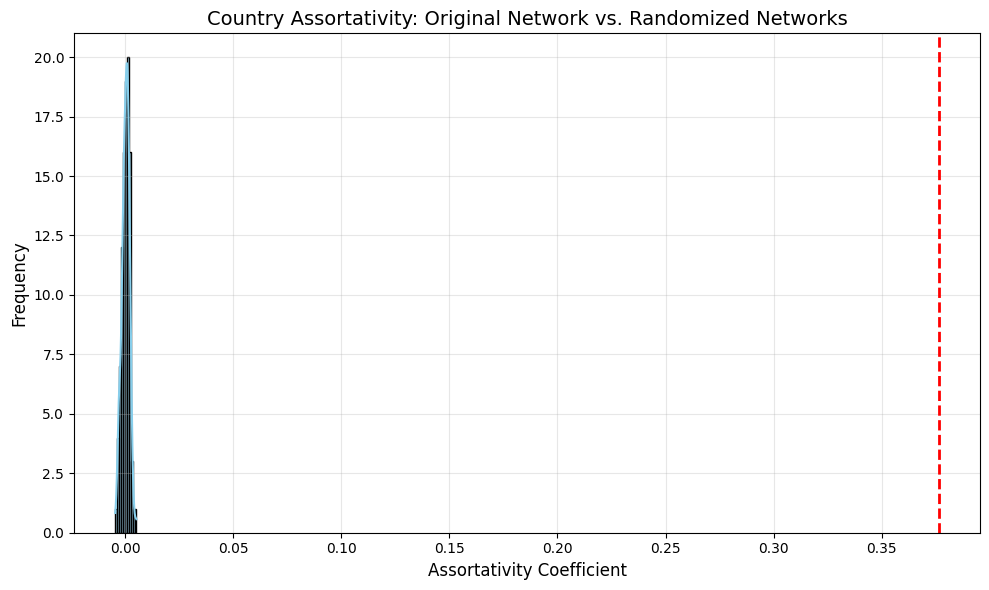

Original network assortativity: 0.3765
Randomized networks mean assortativity: 0.0001 ± 0.0017
P-value: 0.0000
The country assortativity in the original network is significantly higher than expected by chance.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

original_assortativity = calculate_assortativity(researchers_graph, 'country')

plt.figure(figsize=(10, 6))
sns.histplot(random_assortativities, kde=True, color='skyblue', alpha=0.7)
plt.axvline(x=original_assortativity, color='red', linestyle='--', linewidth=2)

mean_random = np.mean(random_assortativities)
std_random = np.std(random_assortativities)

# Calculate the p-value
p_value = sum(r >= original_assortativity for r in random_assortativities) / len(random_assortativities)
significance_text = "significant" if p_value < 0.05 else "not significant"

plt.title("Country Assortativity: Original Network vs. Randomized Networks", fontsize=14)
plt.xlabel("Assortativity Coefficient", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

# Print statistical summary
print(f"Original network assortativity: {original_assortativity:.4f}")
print(f"Randomized networks mean assortativity: {mean_random:.4f} ± {std_random:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("The country assortativity in the original network is significantly higher than expected by chance.")
else:
    print("The country assortativity in the original network is not significantly different from what would be expected by chance.")

> __Exercise 2: Zachary's karate club__: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function [karate_club_graph](https://networkx.org/documentation/stable//auto_examples/graph/plot_karate_club.html)
>
> 1. Visualize the graph. Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below.
>

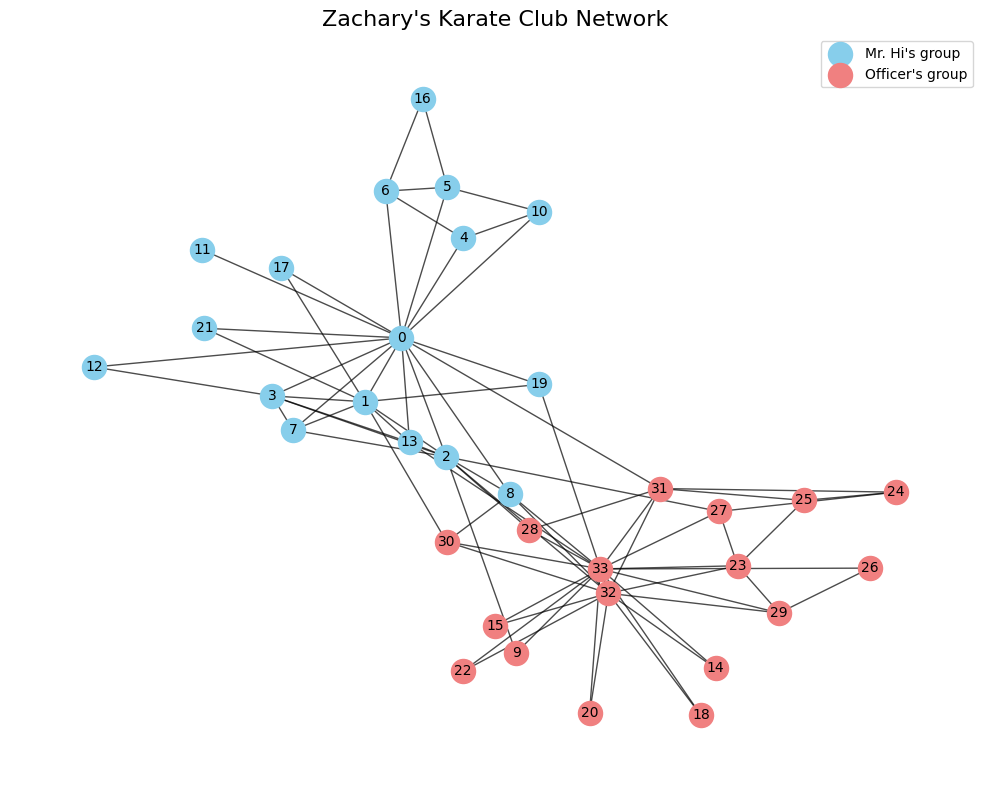

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Load Zachary's Karate Club graph
G_karate = nx.karate_club_graph()

# Extract club information
club1_nodes = []
club2_nodes = []

for node, club in nx.get_node_attributes(G_karate, 'club').items():
    if club == 'Mr. Hi':
        club1_nodes.append(node)
    else:  # club == 'Officer'
        club2_nodes.append(node)

# Set up the visualization
plt.figure(figsize=(10, 8))

# Create a layout for our nodes
pos = nx.spring_layout(G_karate, seed=42)  # Seed for reproducibility

# Draw the nodes
nx.draw_networkx_nodes(G_karate, pos, nodelist=club1_nodes, node_color='skyblue', 
                      node_size=300, label="Mr. Hi's group")
nx.draw_networkx_nodes(G_karate, pos, nodelist=club2_nodes, node_color='lightcoral', 
                      node_size=300, label="Officer's group")

# Draw the edges
nx.draw_networkx_edges(G_karate, pos, width=1.0, alpha=0.7)

# Draw the labels
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_family='sans-serif')

# Add a title and legend
plt.title("Zachary's Karate Club Network", fontsize=16)
plt.legend()

# Remove axis
plt.axis('off')

# Show the graph
plt.tight_layout()
plt.savefig('karate_club_visualization.png', dpi=300)
plt.show()

> 2. Write a function to compute the __modularity__ of a graph partitioning (use **equation 9.12** in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.

In [16]:
def calculate_modularity(G, communities):
    L = G.number_of_edges()
    
    M = 0
    
    for community in communities:
        subgraph = G.subgraph(community)
        
        # L_c: number of edges within community c
        L_c = subgraph.number_of_edges()
        
        # k_c: sum of degrees of nodes in community c
        k_c = sum(G.degree(node) for node in community)
        
        M += (L_c / L) - ((k_c / (2 * L)) ** 2)
    
    return M

> 3. Explain in your own words the concept of _modularity_. 

Modularity measures how well a network is divided into communities. When a network has high modularity, nodes within the same community connect to each other more than to nodes in other communities and the community structure is stronger than what random chance would create

> 4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a [node attribute](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.get_node_attributes.html), called _"club"_.

In [17]:
# Create communities based on the 'club' attribute
def get_communities(G):
    communities = []
    club1 = []
    club2 = []

    for node, club in nx.get_node_attributes(G, 'club').items():
        if club == 'Mr. Hi':
            club1.append(node)
        else:  # club == 'Officer'
            club2.append(node)

    communities = [club1, club2]
    return communities

mod = calculate_modularity(G_karate, get_communities(G_karate))
print(f"Modularity of the club split: {mod:.4f}")

Modularity of the club split: 0.3582


> 5. Create $1000$ randomized version of the Karate Club network using the _double edge swap_ algorithm you wrote in the exercise above 5. For each of them, compute the modularity of the "club" split and store it in a list.

In [18]:
random_karate_graphs = create_random_graphs(G_karate, 1000)
karate_modularities = [calculate_modularity(G, get_communities(G)) for G in random_karate_graphs]

Completed 10/1000 randomized networks
Completed 20/1000 randomized networks
Completed 30/1000 randomized networks
Completed 40/1000 randomized networks
Completed 50/1000 randomized networks
Completed 60/1000 randomized networks
Completed 70/1000 randomized networks
Completed 80/1000 randomized networks
Completed 90/1000 randomized networks
Completed 100/1000 randomized networks
Completed 110/1000 randomized networks
Completed 120/1000 randomized networks
Completed 130/1000 randomized networks
Completed 140/1000 randomized networks
Completed 150/1000 randomized networks
Completed 160/1000 randomized networks
Completed 170/1000 randomized networks
Completed 180/1000 randomized networks
Completed 190/1000 randomized networks
Completed 200/1000 randomized networks
Completed 210/1000 randomized networks
Completed 220/1000 randomized networks
Completed 230/1000 randomized networks
Completed 240/1000 randomized networks
Completed 250/1000 randomized networks
Completed 260/1000 randomized netw

> 6. Compute the average and standard deviation of the modularity for the random network.

In [19]:
average_modularity = np.mean(karate_modularities)
std_modularity = np.std(karate_modularities)
average_modularity, std_modularity

(np.float64(-0.019149901380670676), np.float64(0.04670944784602159))

> 7. Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)).

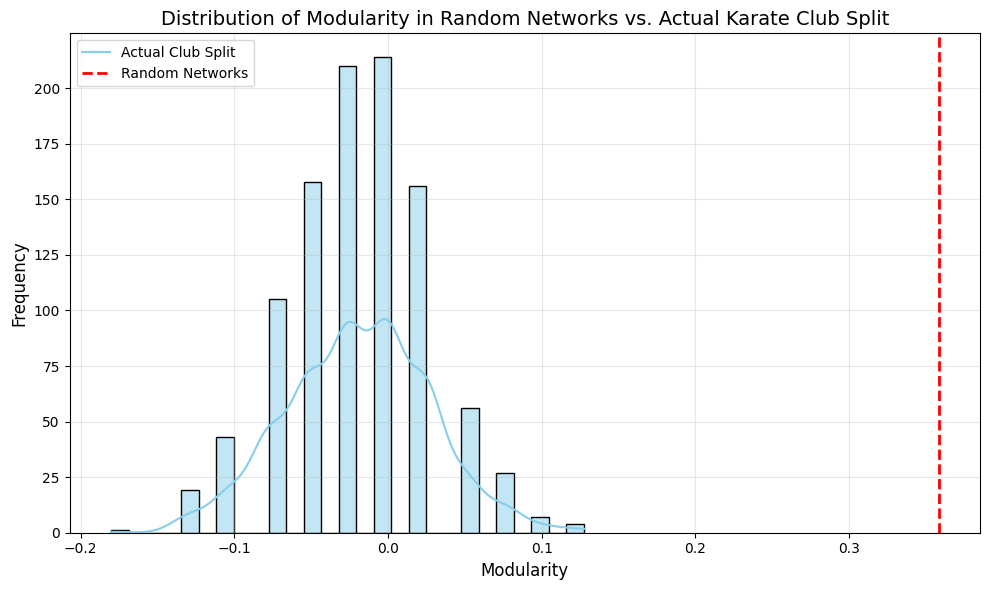

Actual modularity of karate club split: 0.3582
Mean modularity of random networks: -0.0191


In [20]:
plt.figure(figsize=(10, 6))

# Create histogram with kernel density estimate
sns.histplot(karate_modularities, kde=True, color='skyblue')

# Add vertical line for actual modularity
plt.axvline(x=mod, color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Modularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Modularity in Random Networks vs. Actual Karate Club Split', fontsize=14)

# Add legend
plt.legend(['Actual Club Split', 'Random Networks'])

# Add grid for better readability
plt.grid(alpha=0.3)

# Improve layout
plt.tight_layout()

# Save the figure
plt.savefig("karate_modularity_comparison.png", dpi=300)

# Show plot
plt.show()

# Print the actual modularity value
print(f"Actual modularity of karate club split: {mod:.4f}")
print(f"Mean modularity of random networks: {sum(karate_modularities)/len(karate_modularities):.4f}")

> 8. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?

The actual club split (red dashed line at ~0.37) has a modularity value much higher than any of the random networks, which mostly cluster around 0. This indicates that the club split is a good partitioning, better than would occur by random chance.

By creating many random networks and measuring their modularity, we establish a null distribution that shows what modularity values would be expected by chance alone

Preserving the node degrees during randomization was needed because it creates a fair comparison. By keeping each node's number of connections the same while randomizing who they connect to, we're testing whether the specific pattern of connections (who connects to whom) matters, not just how many connections exist.

> 9.  Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?

In [21]:
import community as community_louvain

partition = community_louvain.best_partition(G_karate)
# Calculate the modularity of this partition
modularity = community_louvain.modularity(partition, G_karate)
print(f"Modularity found by Louvain algorithm: {modularity:.4f}")

Modularity found by Louvain algorithm: 0.4266


The modularity is higher than what we found above.

The Louvain algorithm found a modularity value higher than the actual club split (0.37). This reveals that while the real-world division of the karate club reflected genuine community structure, it wasn't necessarily the optimal division from a purely network perspective.

Network algorithms can sometimes detect more mathematically optimal divisions than what emerges naturally in social settings

The actual club split was likely influenced by factors beyond just network connections, such as personal loyalties or events not captured in the network data

> 10.  Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix **_D_** with dimension (2 times _A_), where _A_ is the number of communities found by Louvain. We set entry _D_(_i_,_j_) to be the number of nodes that community _i_ has in common with group split _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

In [22]:
club_split = {}
for node, club in nx.get_node_attributes(G_karate, 'club').items():
    if club == 'Mr. Hi':
        club_split[node] = 0  # Mr. Hi's group
    else:
        club_split[node] = 1  # Officer's group

# Get the Louvain communities
louvain_communities = partition  # from your previous code

# Find number of Louvain communities
num_louvain = len(set(louvain_communities.values()))

# Create the confusion matrix
confusion_matrix = np.zeros((num_louvain, 2), dtype=int)

# Fill the confusion matrix
for node in G_karate.nodes():
    louvain_group = louvain_communities[node]
    club_group = club_split[node]
    confusion_matrix[louvain_group, club_group] += 1

# Create a nice DataFrame for display
club_names = ["Mr. Hi's group", "Officer's group"]
louvain_names = [f"Louvain Community {i}" for i in range(num_louvain)]
confusion_df = pd.DataFrame(confusion_matrix, index=louvain_names, columns=club_names)

print("Confusion Matrix:")
print(confusion_df)

Confusion Matrix:
                     Mr. Hi's group  Officer's group
Louvain Community 0              10                0
Louvain Community 1               6                0
Louvain Community 2               0                4
Louvain Community 3               1               13


The Louvain algorithm has effectively detected the underlying faction structure but with finer granularity, splitting each faction into two sub-communities. This suggests there might be meaningful substructures within each faction that the algorithm is capturing. The near-perfect separation between the two factions (with only one misclassification) indicates that the network topology strongly reflects the known social split.

## Part 3 - Words that characterize Computational Social Science communities

These exercises are taken from Week 8
> __Exercise 1: TF-IDF and the Computational Social Science communities.__ The goal for this exercise is to find the words charachterizing each of the communities of Computational Social Scientists.
> What you need for this exercise: 
>    * The assignment of each author to their network community, and the degree of each author (Week 6, Exercise 4). This can be stored in a dataframe or in two dictionaries, as you prefer.  
>    * the tokenized _abstract_ dataframe (Week 7, Exercise 2)

In [ ]:
from collections import Counter

partition = community_louvain.best_partition(researchers_graph)

# Calculate the modularity of this partition
modularity = community_louvain.modularity(partition, researchers_graph)
print(f"Modularity found by Louvain algorithm: {modularity:.4f}")

# Count communities and their sizes
community_sizes = Counter(partition.values())
num_communities = len(community_sizes)
print(f"Number of communities found: {num_communities}")

community_data = []
for node in researchers_graph.nodes():
    if 'name' in researchers_graph.nodes[node]:
        community_data.append({
            'author_id': node,
            'name': researchers_graph.nodes[node].get('name', 'Unknown'),
            'country': researchers_graph.nodes[node].get('country', 'Unknown'),
            'community': partition[node],
            'citation_count': researchers_graph.nodes[node].get('citation_count', 0)
        })

community_df = pd.DataFrame(community_data)
community_df.to_csv("files/author_communities.csv", index=False)

Modularity found by Louvain algorithm: 0.8289
Number of communities found: 184


In [24]:
import ast

abstracts_df = pd.read_csv("files/abstracts_combined.csv")
abstracts_df = abstracts_df.dropna(subset=['abstract_inverted_index'])

def inverted_indexed_abstract_to_text(abstract):
    abstract_dict = ast.literal_eval(abstract)
    return " ".join(abstract_dict.keys())

abstracts_df["text"] = abstracts_df["abstract_inverted_index"].apply(inverted_indexed_abstract_to_text)

In [ ]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt_tab')

stemmer = PorterStemmer()

# Function to tokenize text according to guidelines
def tokenize_text(text, apply_stemming=False, remove_stopwords=False):
    # Convert to lowercase
    text = text.lower()
    
    # Replace URLs with space
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    
    # Replace mathematical symbols and numbers with space
    text = re.sub(r'[0-9]+|[+\-*/=^(){}[\]<>~|]', ' ', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove punctuation and non-alphabetic tokens
    tokens = [token for token in tokens if token.isalpha()]

    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming if requested
    if apply_stemming:
        tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

abstracts_df["tokens"] = abstracts_df["text"].apply(lambda x: tokenize_text(x, remove_stopwords=True))

[nltk_data] Downloading package punkt_tab to /Users/micki/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


> 1. First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 

TF stands for Term Frequency, which measures how often a word appears in a document. It's typically calculated as the number of times a term appears in a document divided by the total number of terms in that document.

>   * What does IDF stand for?

IDF stands for Inverse Document Frequency, which measures how rare or common a word is across all documents in the collection. It's calculated as the logarithm of the total number of documents divided by the number of documents containing the term.

> 2. Now, we want to find out which words are important for each *community*, so we're going to create several ***large documents, one for each community***. Each document includes all the tokens of abstracts written by members of a given community. 
>   * Consider a community _c_
>   * Find all the abstracts of papers written by a member of community _c_.
>   * Create a long array that stores all the abstract tokens 
>   * Repeat for all the communities. 
> __Note:__ Here, to ensure your code is efficient, you shall exploit ``pandas`` builtin functions, such as [``groupby.apply``](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) or [``explode``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).

In [26]:
papers_df = pd.read_csv("files/combined_papers_filtered.csv")

papers_df['author_ids'] = papers_df['author_ids'].apply(ast.literal_eval)

papers_authors_df = papers_df.explode('author_ids')

author_community_map = dict(zip(community_df['author_id'], community_df['community']))

papers_authors_df['community'] = papers_authors_df['author_ids'].map(author_community_map)

paper_communities = papers_authors_df.groupby('id')['community'].apply(set).to_dict()

abstracts_df['communities'] = abstracts_df['id'].map(paper_communities)

abstracts_with_communities = abstracts_df.explode('communities')
abstracts_with_communities = abstracts_with_communities.rename(columns={'communities': 'community'})
abstracts_with_communities = abstracts_with_communities.dropna(subset=['community'])

community_tokens = (
    abstracts_with_communities
    .groupby('community')
    .apply(lambda x: [token for sublist in x['tokens'] for token in sublist])
    .to_dict()
)

# Step 10: Create a DataFrame to store the results
community_docs_df = pd.DataFrame({
    'community': list(community_tokens.keys()),
    'all_tokens': list(community_tokens.values()),
    'doc_length': [len(tokens) for tokens in community_tokens.values()]
})

print(f"Created {len(community_docs_df)} community documents")
print(community_docs_df[['community', 'doc_length']].head())

# Optional: Save the community documents
community_docs_df.to_csv("files/community_documents.csv", index=False)

/var/folders/s5/zrk3rqb911x4dr5k1tvqz2600000gn/T/ipykernel_56802/1129423471.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: [token for sublist in x['tokens'] for token in sublist])


Created 168 community documents
   community  doc_length
0        0.0      230991
1        1.0      152451
2        2.0      128986
3        3.0       80339
4        4.0       99282


> 3. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the __top 5 communities__ (by number of authors). 

In [27]:
community_sizes = community_df['community'].value_counts()
top_communities = community_sizes.nlargest(5).index.tolist()
print(f"Top 5 communities by size: {top_communities}")

Top 5 communities by size: [12, 0, 41, 1, 21]


In [28]:
def calculate_tf(tokens):
    term_counts = Counter(tokens)
    total_terms = len(tokens)
    return {term: count/total_terms for term, count in term_counts.items()}

# Calculate TF for each community
community_tf = {}
for community, tokens in community_tokens.items():
    if community in top_communities:
        community_tf[community] = calculate_tf(tokens)

# Find top 5 terms for each top community
top_terms = {}
for community, tf_dict in community_tf.items():
    sorted_terms = sorted(tf_dict.items(), key=lambda x: x[1], reverse=True)
    top_terms[community] = sorted_terms[:5]

for community, terms in top_terms.items():
    print(f"\nCommunity {community} top terms:")
    for term, freq in terms:
        print(f"  {term}: {freq:.6f}")


Community 0.0 top terms:
  data: 0.004905
  model: 0.004489
  show: 0.004273
  based: 0.004022
  also: 0.003546

Community 1.0 top terms:
  networks: 0.005425
  data: 0.005182
  network: 0.005175
  model: 0.004703
  social: 0.004237

Community 12.0 top terms:
  data: 0.004599
  social: 0.004298
  study: 0.004254
  based: 0.004168
  users: 0.004046

Community 21.0 top terms:
  learning: 0.007064
  model: 0.005326
  data: 0.004048
  based: 0.003839
  models: 0.003780

Community 41.0 top terms:
  based: 0.007043
  model: 0.005889
  paper: 0.005670
  learning: 0.005614
  data: 0.005427


>   * Describe similarities and differences between the communities.

## Similarities:
- "Data" appears in the top 5 for all communities, showing data analysis is central to all groups
- "Model" is prominent in 4/5 communities, indicating modeling approaches are widely used
- "Based" appears frequently in 4/5 communities, suggesting reference to established methodologies

## Differences:
- Community 1.0 focuses on network analysis with emphasis on "networks," "network," and "social"
- Community 12.0 centers on social computing with "social," "study," and "users" 
- Community 21.0 emphasizes machine learning with "learning" as its top term (0.007064)
- Community 41.0 combines learning approaches with academic focus ("paper" appears distinctively)
- Community 0.0 has "show" as a distinctive term, possibly indicating visualization emphasis

>   * Why aren't the TFs not necessarily a good description of the communities?

Common words: Some terms may be common across all communities (e.g., “data”, “analysis”, “research”, etc.). TF only tells you how frequent a word is within a community, but it doesn’t consider whether that word is also frequent elsewhere.

Community size: Larger communities might have a lot of documents, so the raw count of a word could be higher. TF normalizes by total tokens, but you still might see “generic” domain words floating to the top.

No global context: TF does not penalize words that appear in many other communities. Hence, TF alone might over‐emphasize words that are simply frequent in the overall corpus, rather than words that are uniquely important to that community.

>   * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?

In [32]:
import math
import collections

N = len(community_docs_df)  # total number of communities
print(f"Total communities: {N}")

# Count how many different communities each word appears in
word_in_communities = collections.Counter()

for tokens in community_docs_df["all_tokens"]:
    unique_tokens = set(tokens)
    for word in unique_tokens:
        word_in_communities[word] += 1

# Compute IDF for each word
idf_dict = {}
for word, count_in_comms in word_in_communities.items():
    # log base 10 here, but you can use math.log(x) for natural log, etc.
    idf_dict[word] = math.log(N / count_in_comms, 10)  

sorted_by_idf = sorted(idf_dict.items(), key=lambda x: x[1], reverse=True)
print("Top 10 words by IDF:")
for w, val in sorted_by_idf[:10]:
    print(f"  {w} => {val:.4f}")

Total communities: 168
Top 10 words by IDF:
  sydnor => 2.2253
  yehoshua => 2.2253
  hanged => 2.2253
  restructurings => 2.2253
  handprints => 2.2253
  opencap => 2.2253
  chaturvedi => 2.2253
  warring => 2.2253
  persival => 2.2253
  boykov => 2.2253


In the code, we used the base 10 algorithm for calculating IDF. The choice of logarithm base isn't very important because the relative ranking of terms by IDF value remains the same regardless of which base you use, and different bases only scale the final values by a constant factor

> 4. We're ready to calculate TF-IDF. Do that for the __top 9 communities__ (by number of authors). Then for each community: 
>   * List the 10 top TF words 
>   * List the 10 top TF-IDF words
>   * List the top 3 authors (by degree)
>   * Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?

In [34]:
community_sizes = community_df['community'].value_counts()
top9_communities = community_sizes.nlargest(9).index.tolist()
print(f"Top 9 communities by size: {top9_communities}")

top9_docs = community_docs_df[community_docs_df['community'].isin(top9_communities)]

community_tf = {}
for _, row in top9_docs.iterrows():
    community = row['community']
    tokens = row['all_tokens']
    term_counts = Counter(tokens)
    total_terms = len(tokens)
    community_tf[community] = {term: count/total_terms for term, count in term_counts.items()}

N = len(community_docs_df)  
word_in_communities = collections.Counter()
for tokens in community_docs_df["all_tokens"]:
    unique_tokens = set(tokens)
    for word in unique_tokens:
        word_in_communities[word] += 1

idf_dict = {}
for word, count_in_comms in word_in_communities.items():
    idf_dict[word] = math.log(N / count_in_comms, 10)

community_tfidf = {}
for community, tf_dict in community_tf.items():
    community_tfidf[community] = {term: tf * idf_dict.get(term, 0) for term, tf in tf_dict.items()}

top_authors = {}
for community in top9_communities:
    community_authors = community_df[community_df['community'] == community]['author_id'].tolist()
    
    author_degrees = {
        author: researchers_graph.degree(author) 
        for author in community_authors 
        if author in researchers_graph.nodes()
    }
    
    top_authors[community] = sorted(author_degrees.items(), key=lambda x: x[1], reverse=True)[:3]

for community in top9_communities:
    print(f"\n=== Community {community} ===")
    
    top_tf = sorted(community_tf[community].items(), key=lambda x: x[1], reverse=True)[:10]
    print("\nTop 10 TF words:")
    for term, value in top_tf:
        print(f"  {term}: {value:.6f}")
    
    top_tfidf = sorted(community_tfidf[community].items(), key=lambda x: x[1], reverse=True)[:10]
    print("\nTop 10 TF-IDF words:")
    for term, value in top_tfidf:
        print(f"  {term}: {value:.6f}")
    
    print("\nTop 3 authors by degree:")
    for author_id, degree in top_authors[community]:
        author_name = community_df[community_df['author_id'] == author_id]['name'].values[0]
        print(f"  {author_name} (Degree: {degree})")

Top 9 communities by size: [12, 0, 41, 1, 21, 2, 15, 14, 3]

=== Community 12 ===

Top 10 TF words:
  data: 0.004599
  social: 0.004298
  study: 0.004254
  based: 0.004168
  users: 0.004046
  work: 0.004035
  use: 0.003949
  results: 0.003783
  paper: 0.003764
  research: 0.003642

Top 10 TF-IDF words:
  users: 0.001589
  people: 0.001183
  online: 0.001172
  social: 0.001165
  work: 0.001113
  user: 0.001094
  task: 0.000945
  design: 0.000943
  use: 0.000907
  participants: 0.000886

Top 3 authors by degree:
  Eric Horvitz (Degree: 212)
  Munmun De Choudhury (Degree: 149)
  Jeffrey T. Hancock (Degree: 149)

=== Community 0 ===

Top 10 TF words:
  data: 0.004905
  model: 0.004489
  show: 0.004273
  based: 0.004022
  also: 0.003546
  results: 0.003295
  models: 0.003273
  using: 0.003260
  information: 0.003147
  learning: 0.003078

Top 10 TF-IDF words:
  show: 0.001097
  task: 0.001056
  problem: 0.000916
  model: 0.000898
  learning: 0.000849
  network: 0.000839
  models: 0.000825
  

The IDF component makes these words more informative by downweighting common academic terms like "data," "study," and "results" that appear across all communities while highlighting distinctive vocabulary through giving greater weight to terms that appear in fewer communities. It creates a balance between frequency and uniqueness, rewarding words that are both common within a specific community yet uncommon elsewhere—precisely the terms that define a field's specialized focus. This creates clear differentiation between communities, as the TF lists appear relatively similar across groups, while TF-IDF lists immediately reveal each community's unique research identity. This effectiveness demonstrates why TF-IDF has become foundational in information retrieval—it identifies what truly distinguishes document collections by filtering out common vocabulary and emphasizing specialized terminology.

It seems like the TF list would be good to capture the context of the document, while the TF-IDF would then be good to capture the specialized terminology.


 __Exercise 2: The Wordcloud__. It's time to visualize our results!

> * Install the [`WordCloud`](https://pypi.org/project/wordcloud/) module. 
> * Now, create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like.
> * Make sure that, together with the word cloud, you print the names of the top three authors in each community (see my plot above for inspiration). 

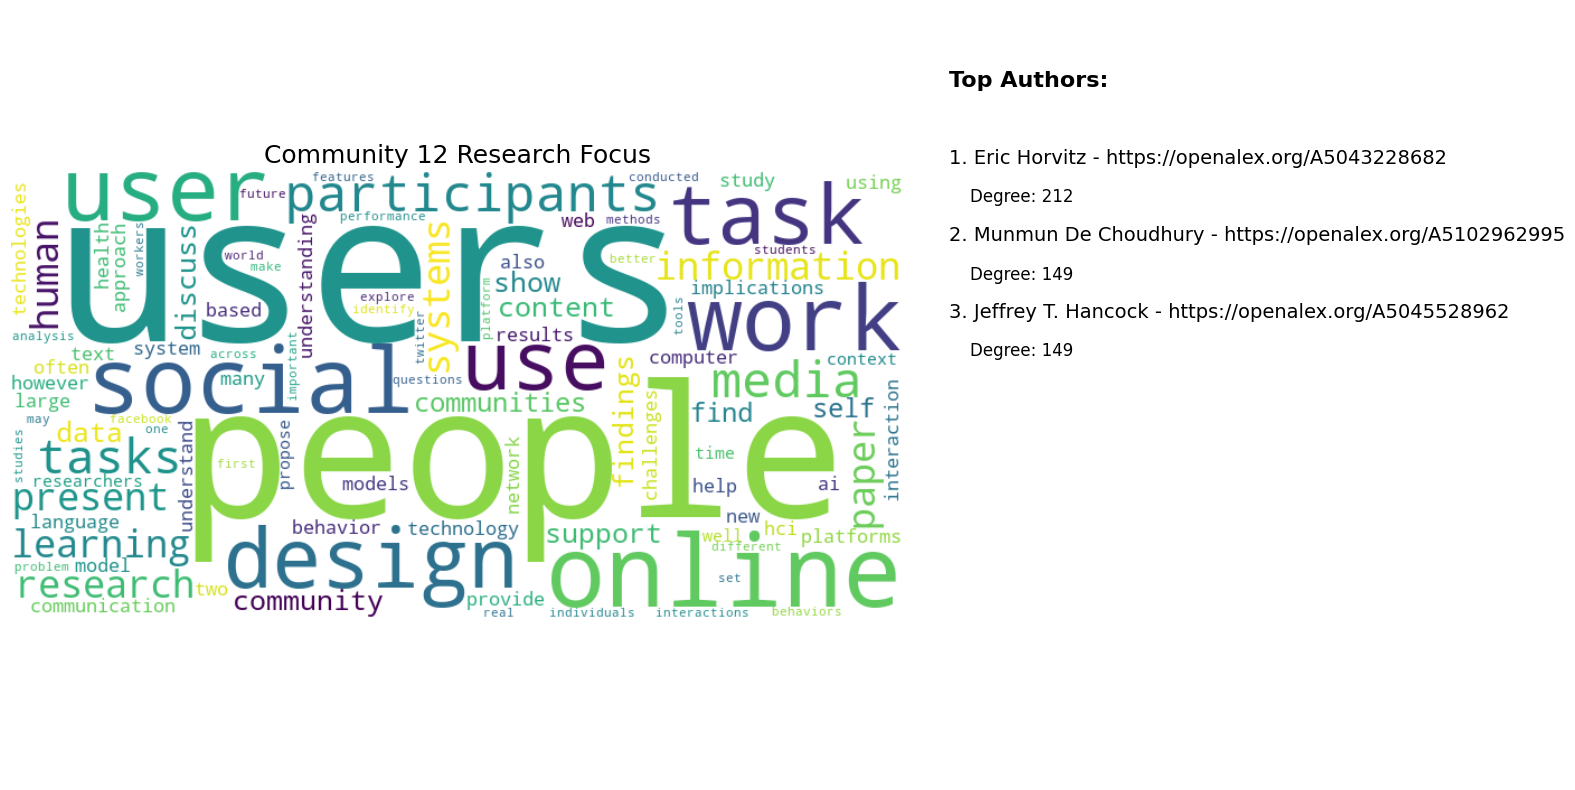

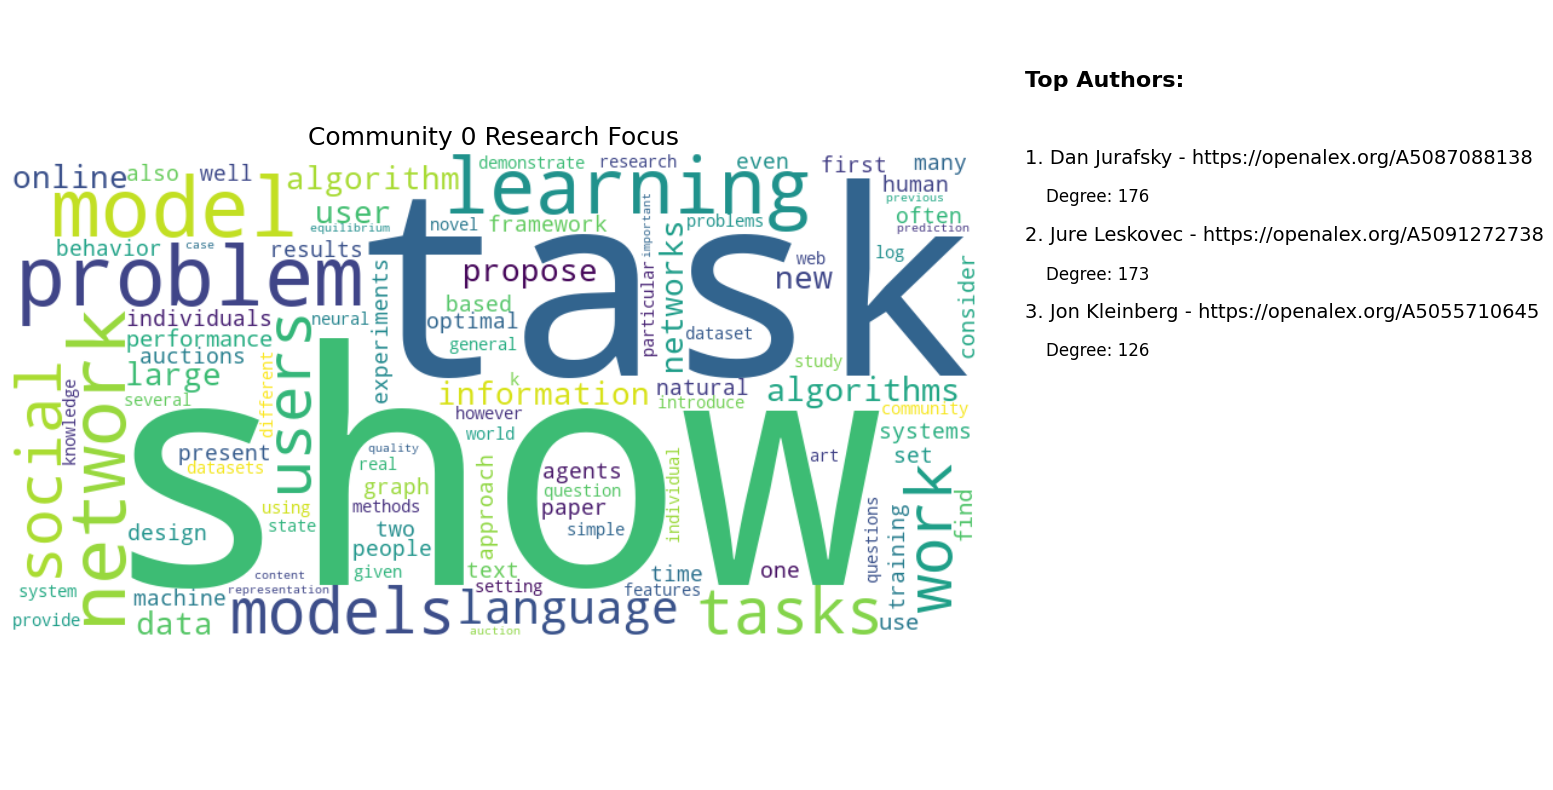

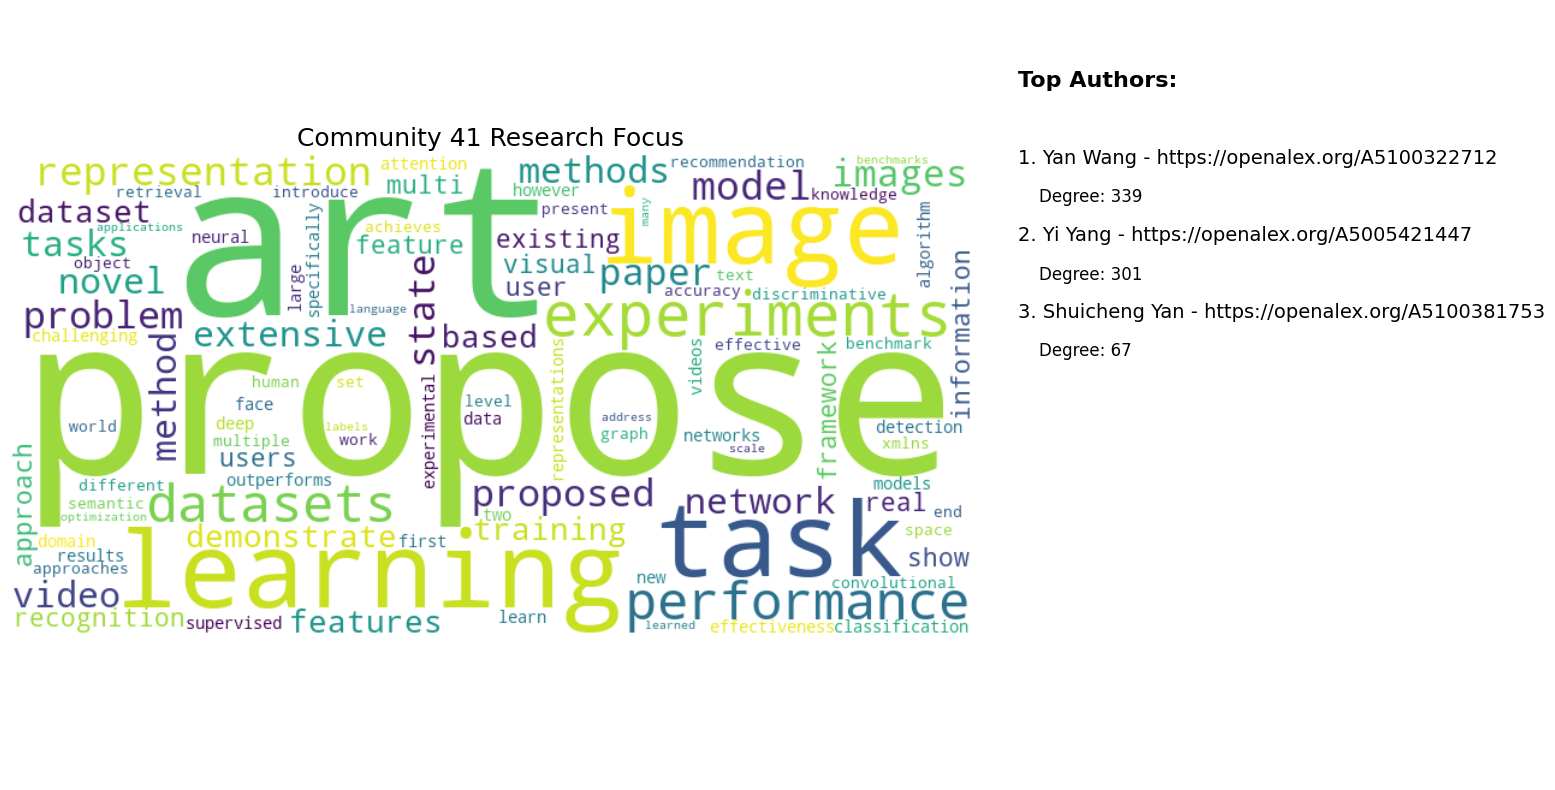

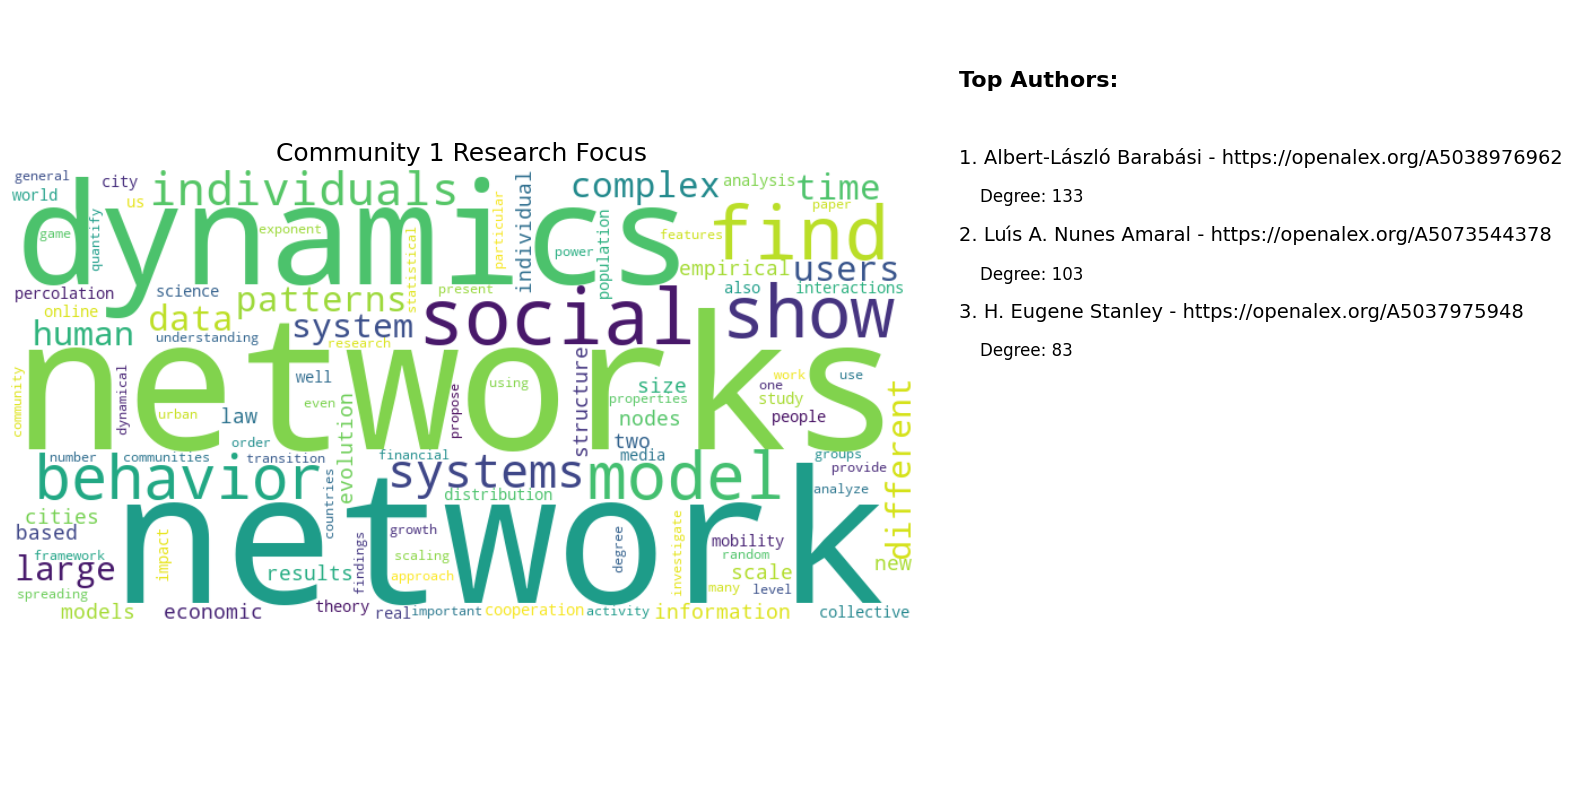

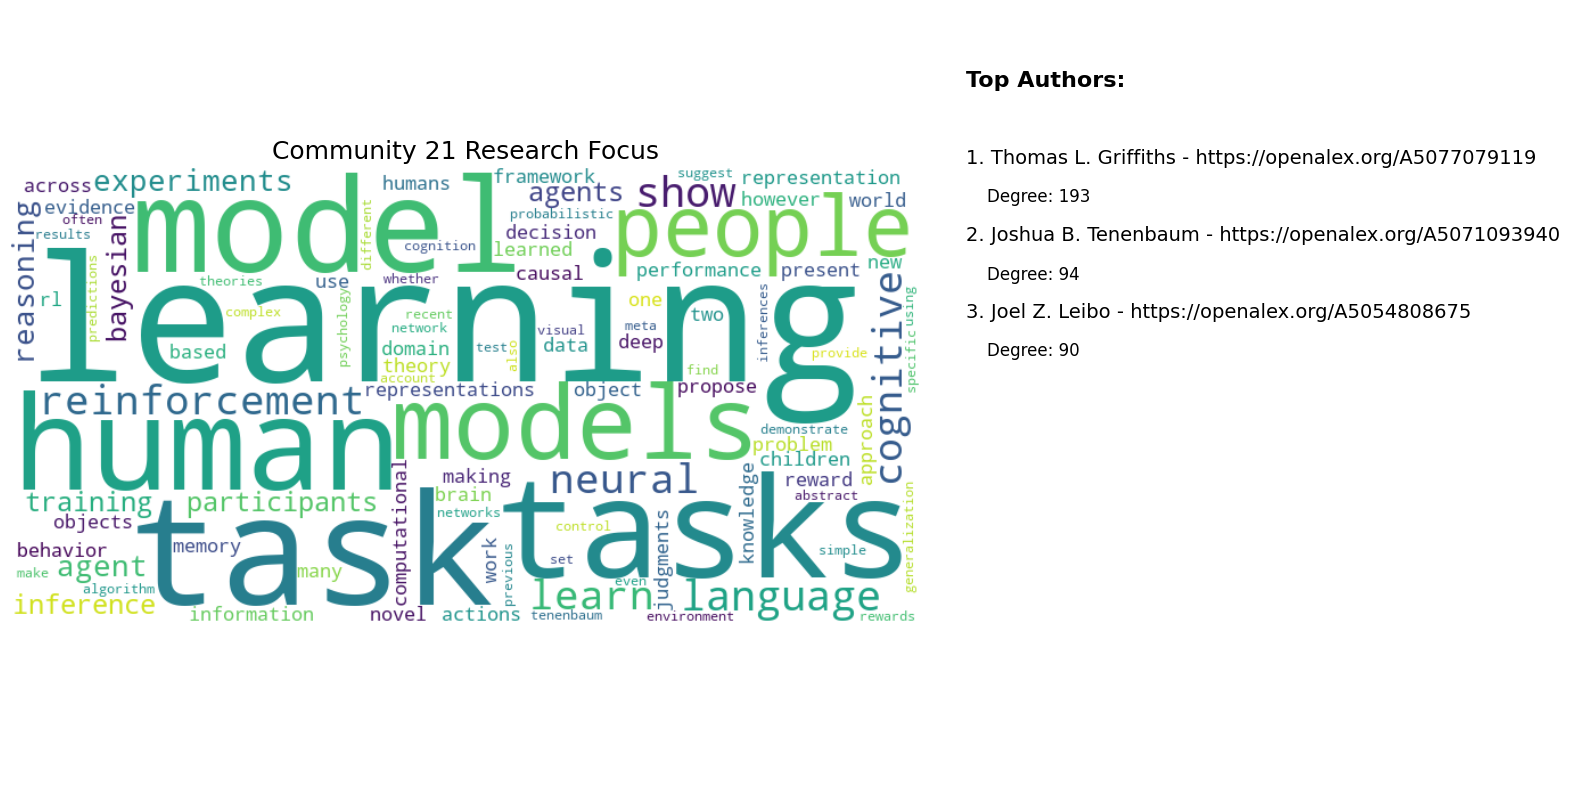

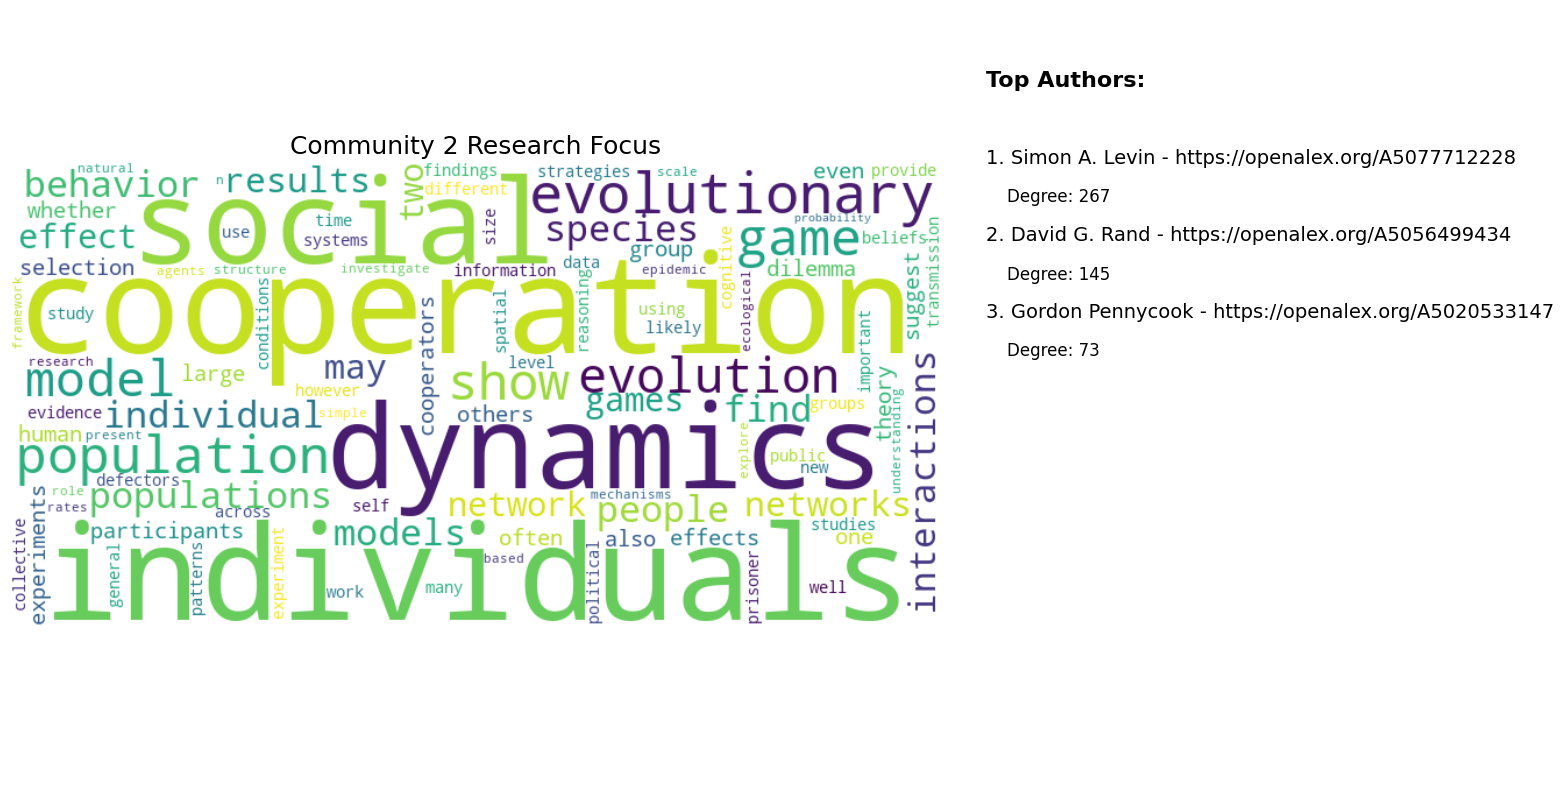

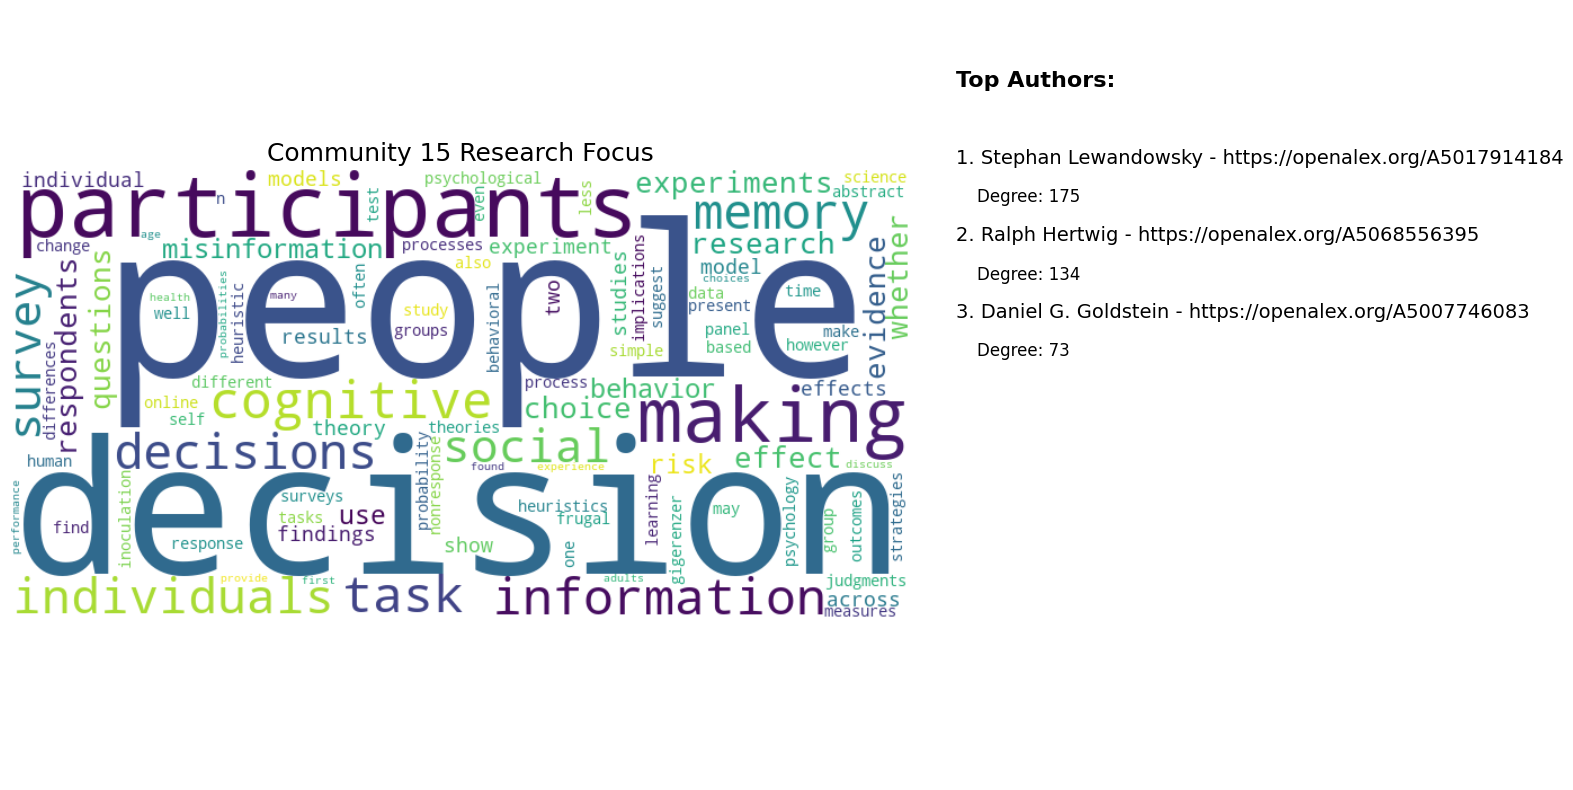

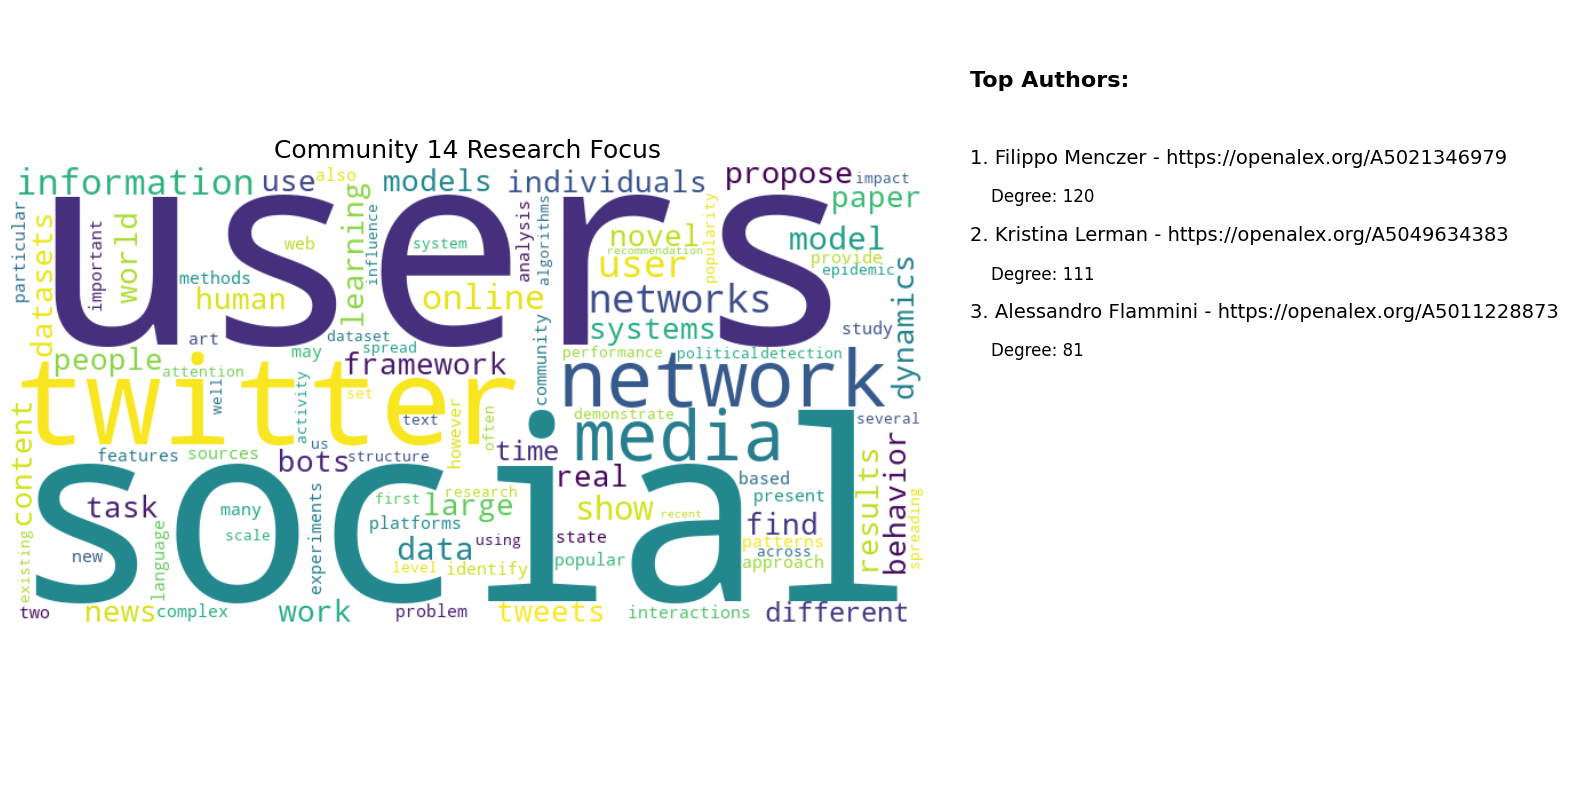

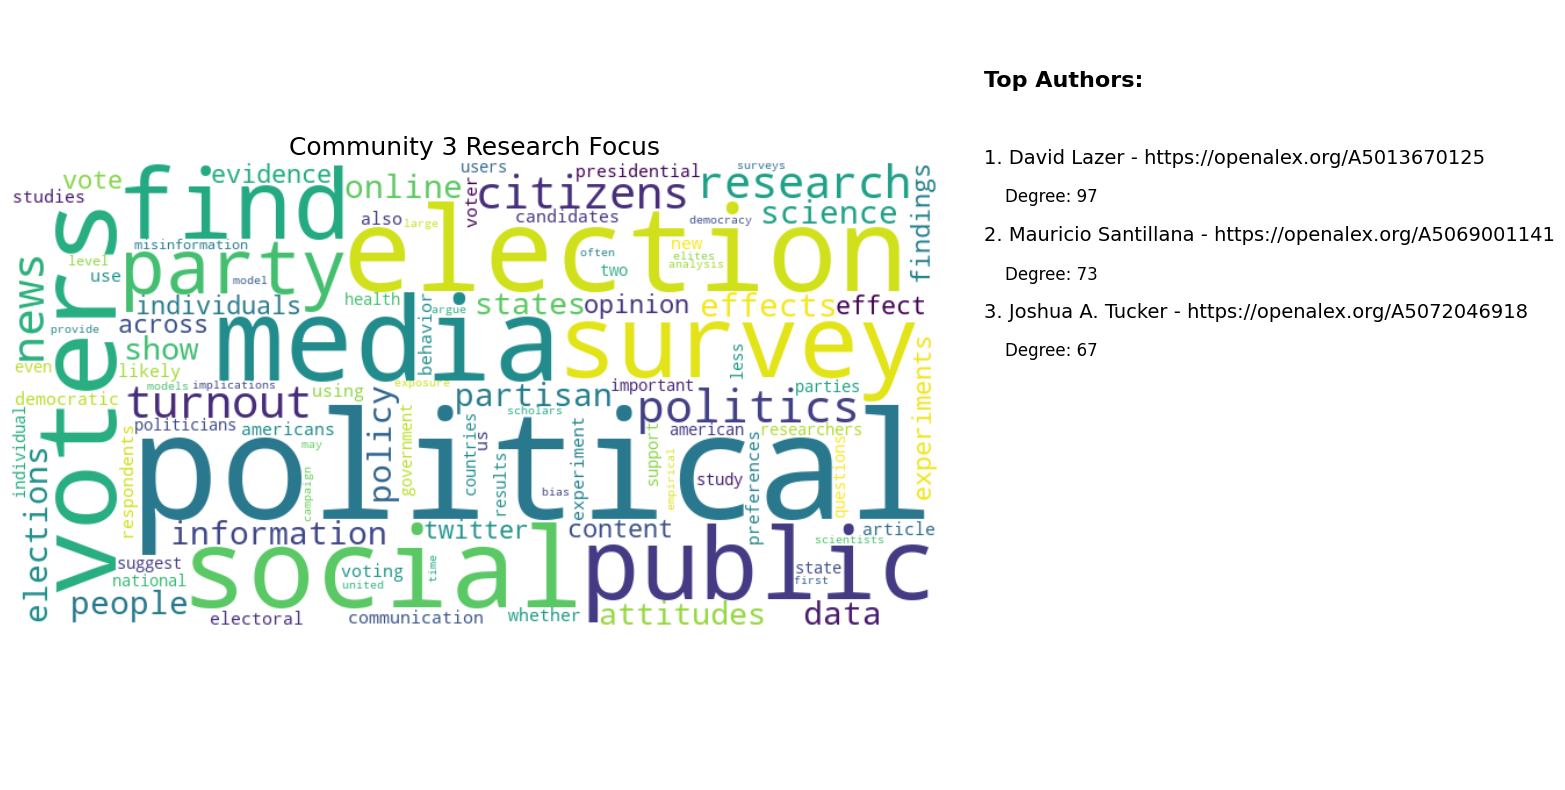

In [39]:
# Install the WordCloud module
# !pip install wordcloud matplotlib

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Assuming you have your community_tfidf dictionary from the previous analysis
# Let's create a function to generate wordclouds

def generate_wordcloud(community_id, tfidf_dict, top_authors):
    # Create a figure with two subplots - one for wordcloud, one for author info
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), 
                                   gridspec_kw={'width_ratios': [3, 1]})
    
    # Generate the wordcloud
    wordcloud = WordCloud(width=800, height=400, 
                          background_color='white',
                          max_words=100, 
                          colormap='viridis',
                          contour_width=1, 
                          contour_color='steelblue')
    
    # Generate the wordcloud from the tfidf dictionary
    wordcloud.generate_from_frequencies(tfidf_dict)
    
    # Plot the wordcloud
    ax1.imshow(wordcloud, interpolation='bilinear')
    ax1.set_title(f'Community {community_id} Research Focus', fontsize=18)
    ax1.axis('off')
    
    # Add top authors information
    ax2.axis('off')
    ax2.text(0.1, 0.9, 'Top Authors:', fontsize=16, fontweight='bold')
    
    for i, (author_name, degree, id) in enumerate(top_authors):
        ax2.text(0.1, 0.8 - i*0.1, f"{i+1}. {author_name} - {id}", fontsize=14)
        ax2.text(0.1, 0.75 - i*0.1, f"    Degree: {degree}", fontsize=12)
    
    plt.tight_layout()
    plt.savefig(f'community_{community_id}_wordcloud.png', dpi=300, bbox_inches='tight')
    plt.show()

# Loop through the top 9 communities and generate wordclouds
for community in top9_communities:
    # Get the top authors for this community
    author_info = [(community_df[community_df['author_id'] == author_id]['name'].values[0], degree, author_id) 
                   for author_id, degree in top_authors[community]]
    
    # Generate and display wordcloud
    generate_wordcloud(community, community_tfidf[community], author_info)

> * Comment on your results. What can you conclude on the different sub-communities in Computational Social Science? 

Community 12: a focus on user studies and human-computer interaction with terms like "users," "people," "online," "design," and "participants"

Community 0: Shows a machine learning/task-oriented focus

Community 41: Clearly shows a computer vision/deep learning specialization with "art," "image," "datasets," "representation"

Community 1: Distinctly focuses on network science and dynamics

Community 21: Cognitive science/human learning emphasis

Community 2: Evolutionary game theory and cooperation studies

Community 15: Decision-making and cognitive psychology

Community 14: Social media analysis specializing in Twitter

Community 3: Political science, elections and voting behavior

> * Look up online the top author in each community. In light of your search, do your results make sense?

- Eric Horvitz from community 12 focuses on users of social media, and what effect they have. Psychological topics.

- Dan Jurafsky from community 0 focuses on machine learning tasks and language

- Yan Wang from community 41 focuses on machine learning and data security

- Albert Laszio Barabasi from community 1 focuses on physics and biology, as well as network analysis.

- Thomas L. Griffiths from community 21 focuses on language and evolution as well as development in children and animal.

- Simon A. Levin from community 2 focuses on evolutionary game theory and evolution. He has also done studies on cooperation and COVID-19

- Stephan Lewandowsky from community 15 focuses on misinformation, climate change communication and memory processes and influences.

- Filippo Menzer from community 14 focuses on data mining and analysis with focus on phishing and spam. So a large focus on social media and politics.

- David Lazer from community 3 focuses a lot on COVID-19, such as vaccine coverage and social media politics. 

 __Exercise 3: Computational Social Science__ 

> * Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science. 
> * In light of your data-driven analysis, has your understanding of the field changed? How? __(max 150 words)__

Social Science is about analysing data about human interaction and human behavior. Though big data, we can use computational methods and visualizations to get a more detailed view and understanding of the dynamics of a network. Our understanding has changed, before we used to think of computational social science as being about analysing people and their behaviour, however now we understand it as the interactions between people and the way people connect.